In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binary-digits-mnist-portion/y.npy
/kaggle/input/binary-digits-mnist-portion/X.npy


### **Dataset**
This dataset is taken from the course Advanced Learning Algorithms of Machine Learning Specialization. It is purely used for Educational and practice purpose.
- The data set contains 1000 training examples of handwritten digits, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.


- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set

> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)

In [2]:
X = np.load("/kaggle/input/binary-digits-mnist-portion/X.npy")[0:1000]
y = np.load("/kaggle/input/binary-digits-mnist-portion/y.npy")[0:1000]


### **Shape of X and y**

In [3]:
X.shape

(1000, 400)

In [4]:
y.shape

(1000, 1)

In [5]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


### **Importing Libraries**

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

### **Visualization of One Image**

Text(0.5, 1.0, '1')

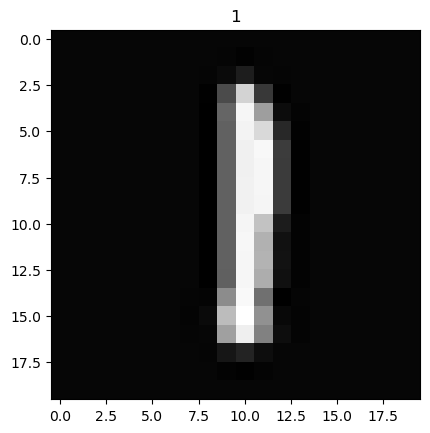

In [7]:
x1 = X[0].reshape(20,20).T
plt.imshow(x1, cmap='gray')
plt.title(y[0,0])
x1 = X[-1].reshape(20,20).T
plt.imshow(x1, cmap='gray')
plt.title(y[-1,0])


### **Model building**

In [8]:
model = Sequential([
    Input(shape=(400,)),
    Dense(25,activation="sigmoid",name="layer1"),
    Dense(15,activation="sigmoid",name="layer2"),
    Dense(1,activation="sigmoid",name="layer3"),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [10]:
[layer1,layer2,layer3] = model.layers
W1,b1= layer1.get_weights()
W2,b2= layer2.get_weights()
W3,b3= layer3.get_weights()
W3

array([[-0.45683253],
       [-0.14729455],
       [-0.10266757],
       [-0.22066063],
       [ 0.15258694],
       [ 0.41986328],
       [-0.14026853],
       [-0.06399077],
       [ 0.17357194],
       [-0.24704811],
       [ 0.23092419],
       [ 0.57914406],
       [ 0.29649282],
       [-0.5492288 ],
       [ 0.51660067]], dtype=float32)

### **Compiling and Fitting** 

In [11]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.001))

In [12]:
model.fit(X,y,epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6257
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4777
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3295
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2252
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1613
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1214
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0951
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0769
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0640
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0542
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0469
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0411
Epoch 13/20
32/32 [==============================

### **Prediction**

In [13]:
print("prediction",np.squeeze(model.predict(X[500].reshape(1,400))),"actual",y[500,0])

1/1 [==============================] - 0s 76ms/step
prediction 0.9854044 actual 1


1/1 [==============================] - 0s 18ms/step


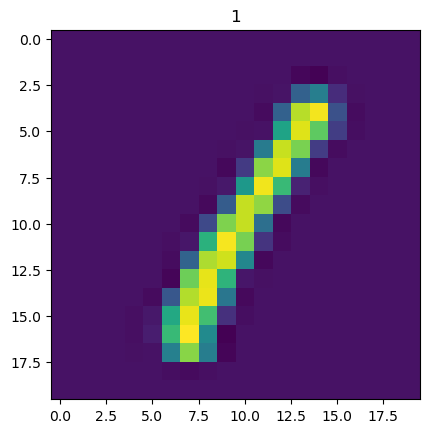

In [14]:
plt.imshow(X[500].reshape(20,20).T)
plt.title(1 if np.squeeze(model.predict(X[500].reshape(1,400)))>0.5 else 0)
plt.show()